## Initial temporal disturbance sims
Leaving this untouched, this was for the original analysis for a BII meeting in November

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import glob
import ipyparallel as ipp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import iBioGen

from collections import Counter
from itertools import combinations
from IPython.display import display

pd.set_option('display.max_columns', None)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = iBioGen.Core("BII")
data.set_param("assembly_model", "neutral")
data.set_param("ntaxa", 200)
data.set_param("ClaDS", False)
data.set_param("ecological_strength", "1")
data.set_param("colrate", "0.003")
data.set_param("J", "10000")
data.set_param("local_stop_time", 0.25)
data.set_param("local_stop_criterion", "equilibrium")
tre, results = data._simulate(verbose=True)

ntips 200
time 6.580446176625573
Birth events 331
Extinctions (per birth) 132 (0.3987915407854985)
Run generations: 5583
	[####################] 100% 0:00:02 | Finished local assembly 
Time left (myrs): 0.005467 - Lambda 0.25539999999999996


In [3]:
#l._step_wf(100)
data.l._check_stop()
print(data.l._lambda)
data.l._finalize()
data.l.community

0.25539999999999996


,coltime,local_abund,migrants,trait,tau,pi,is_founder
m204-1,0.0,7446.0,993.0,-0.202593,99.0,0.068133,1.0
m87-2,0.0,158.0,249.0,-1.112988,99.0,0.012089,0.0
m272-1,0.0,38.0,103.0,-0.796201,99.0,0.000000,0.0
m272-2,0.0,833.0,734.0,-0.499788,99.0,0.021511,0.0
m267-2,0.0,201.0,269.0,0.039409,99.0,0.005200,0.0
m194-2,0.0,157.0,251.0,0.358361,98.0,0.000000,0.0
m107-1,1.0,62.0,100.0,-1.342831,99.0,0.002800,0.0
m281-2,7.0,25.0,30.0,-2.385015,99.0,0.002222,0.0
m132-2,8.0,156.0,74.0,-2.019323,99.0,0.005333,0.0
m231-2,8.0,460.0,1.0,-0.433274,2.0,0.014667,0.0


In [4]:
times = {}
times["lambdas"] = []
times["pi_hills"] = []
times["abund_hills"] = []
times["local_S"] = []

data.l._check_stop()
idx = 0
while data.l._lambda < 0.95 and idx < 100:
    print(data.l._lambda, end=", ")
    times["lambdas"].append(data.l._lambda)
    times["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
    data.l._finalize()
    times["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
    times["local_S"].append(len(data.l.community))
    idx += 1

    data.l._step_wf(10)
    data.l._check_stop()

# record the last bit
times["lambdas"].append(data.l._lambda)
times["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
data.l._finalize()
times["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
times["local_S"].append(len(data.l.community))

0.25539999999999996, 0.27669999999999995, 0.278, 0.2884, 0.3105, 0.32210000000000005, 0.3184, 0.32999999999999996, 0.3304, 0.3589, 0.3759, 0.38260000000000005, 0.37, 0.39470000000000005, 0.38959999999999995, 0.3899, 0.40690000000000004, 0.41900000000000004, 0.43100000000000005, 0.4144, 0.4346, 0.45589999999999997, 0.47040000000000004, 0.43979999999999997, 0.46950000000000003, 0.47640000000000005, 0.49550000000000005, 0.47219999999999995, 0.46609999999999996, 0.474, 0.5048, 0.49829999999999997, 0.5043, 0.51, 0.5147999999999999, 0.5043, 0.5111, 0.4939, 0.4921, 0.5022, 0.5006999999999999, 0.5004, 0.4992, 0.5021, 0.49929999999999997, 0.48440000000000005, 0.49939999999999996, 0.49450000000000005, 0.5138, 0.5117, 0.5164, 0.5305, 0.5542, 0.5704, 0.5842, 0.5865, 0.5868, 0.5827, 0.5788, 0.599, 0.5892, 0.5808, 0.5495, 0.5418000000000001, 0.5443, 0.5594, 0.5623, 0.5586, 0.5487, 0.5575, 0.5686, 0.5683, 0.5608, 0.5706, 0.5467, 0.5768, 0.5889, 0.6007, 0.6141, 0.614, 0.6185, 0.6396999999999999, 0.629

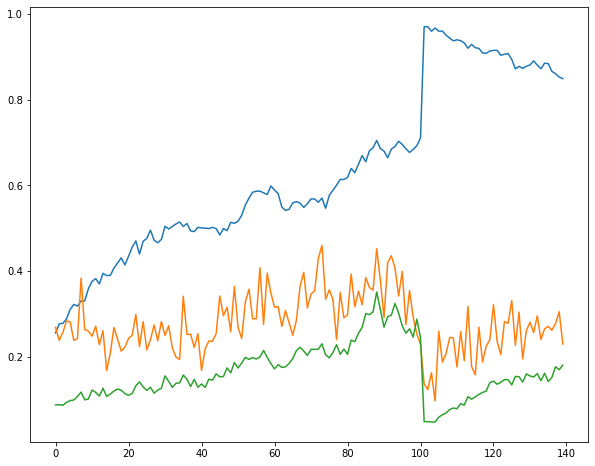

In [10]:
plt.figure(figsize=[10, 8])
plt.plot(range(len(times["lambdas"])), times["lambdas"])
plt.plot(range(len(times["pi_hills"])), np.array(times["pi_hills"])/np.array(times["local_S"]))
plt.plot(range(len(times["abund_hills"])), np.array(times["abund_hills"])/np.array(times["local_S"]))

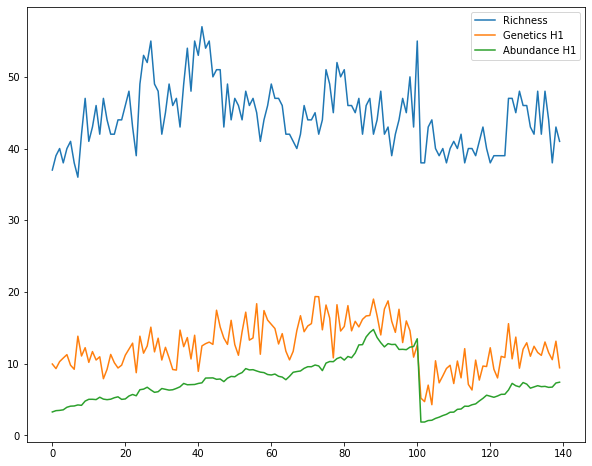

In [11]:
plt.figure(figsize=[10, 8])
plt.plot(range(len(times["local_S"])), times["local_S"], label="Richness")
plt.plot(range(len(times["pi_hills"])), np.array(times["pi_hills"]), label="Genetics H1")
plt.plot(range(len(times["abund_hills"])), np.array(times["abund_hills"]), label="Abundance H1")
plt.legend()
plt.savefig("MESS-DisturbanceHills.svg")
plt.savefig("MESS-DisturbanceHills.png")

55
10000.0
1000
38


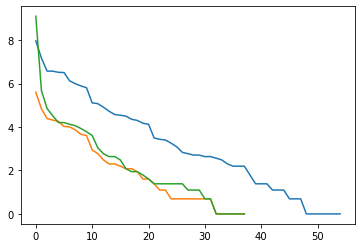

In [8]:
com_pre = data.l.community["local_abund"]
plt.plot(sorted(np.log(com_pre), reverse=True))
probs = data.l.community["local_abund"]/data.paramsdict["J"]
print(len(probs))
nsamp = data.paramsdict["J"]/10
new = np.random.multinomial(nsamp, probs)
print(com_pre.sum())
data.l.community["local_abund"] = new
com_post0 = data.l.community["local_abund"]
print(com_post0.sum())
plt.plot(sorted(np.log(data.l.community["local_abund"][data.l.community["local_abund"] > 0]), reverse=True))
data.l._step_wf(1)
com_post1 = data.l.community["local_abund"]
data.l._check_stop()
plt.plot(sorted(np.log(data.l.community["local_abund"]), reverse=True))
print(len(data.l.community))
times["lambdas"].append(data.l._lambda)
times["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
data.l._finalize()
times["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
times["local_S"].append(len(data.l.community))

In [9]:
gens = 500
while gens > 0:
    print(data.l._lambda, end=", ")
    times["lambdas"].append(data.l._lambda)
    times["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
    data.l._finalize()
    times["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
    times["local_S"].append(len(data.l.community))
    gens -= 10

    data.l._step_wf(10)
    data.l._check_stop()

# record the last bit
times["lambdas"].append(data.l._lambda)
times["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
data.l._finalize()
times["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
times["local_S"].append(len(data.l.community))

0.9708, 0.9601, 0.9678, 0.9604, 0.9606, 0.9511000000000001, 0.9441, 0.9378, 0.9402, 0.9382, 0.9327, 0.9205, 0.9296, 0.9217, 0.9202, 0.9094, 0.9085, 0.9141, 0.9155, 0.9155, 0.9041, 0.9064, 0.908, 0.8944, 0.8724000000000001, 0.8781, 0.8734999999999999, 0.8784, 0.8813, 0.891, 0.8811, 0.8725, 0.8855999999999999, 0.8844, 0.8665, 0.8611, 0.8531, 0.8495, > /home/isaac/iBioGen/iBioGen/LocalCommunity.py(196)_step_wf()
    194             self.time += 1
    195             # Account for extinctions and clean up
--> 196             for idx in self.community.index:
    197                 try:
    198                     if self.community.loc[idx]["local_abund"] == 0:

ipdb> c
> /home/isaac/iBioGen/iBioGen/LocalCommunity.py(196)_step_wf()
    194             self.time += 1
    195             # Account for extinctions and clean up
--> 196             for idx in self.community.index:
    197                 try:
    198                     if self.community.loc[idx]["local_abund"] == 0:

ipdb> c


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Competition w/ bottleneck

In [15]:
data = iBioGen.Core("BII")
data.set_param("assembly_model", "competition")
data.set_param("ntaxa", 200)
data.set_param("ClaDS", False)
data.set_param("ecological_strength", 0.001)
data.set_param("colrate", "0.003")
data.set_param("J", "10000")
data.set_param("local_stop_time", 0.25)
data.set_param("local_stop_criterion", "equilibrium")
tre, results = data._simulate(verbose=True)

ntips 200
time 5.459020678837465
Birth events 252
Extinctions (per birth) 53 (0.21031746031746032)
Run generations: 6735
	[####################] 100% 0:00:02 | Finished local assembly 
Time left (myrs): 0.00663 - Lambda 0.25049999999999994


In [16]:
ctimes = {}
ctimes["lambdas"] = []
ctimes["pi_hills"] = []
ctimes["abund_hills"] = []
ctimes["local_S"] = []

data.l._check_stop()
idx = 0
print(data.l._lambda)
while data.l._lambda < 0.95 and idx < 100:
    print(data.l._lambda, end=", ")
    ctimes["lambdas"].append(data.l._lambda)
    ctimes["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
    data.l._finalize()
    ctimes["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
    ctimes["local_S"].append(len(data.l.community))
    idx += 1

    data.l._step_wf(10)
    data.l._check_stop()

# record the last bit
ctimes["lambdas"].append(data.l._lambda)
ctimes["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
data.l._finalize()
ctimes["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
ctimes["local_S"].append(len(data.l.community))

0.25049999999999994
0.25049999999999994, 0.25039999999999996, 0.26370000000000005, 0.25, 0.2603, 0.24680000000000002, 0.25870000000000004, 0.2712, 0.2721, 0.26380000000000003, 0.273, 0.2764, 0.2802, 0.2965, 0.30010000000000003, 0.30179999999999996, 0.28569999999999995, 0.2824, 0.28769999999999996, 0.28590000000000004, 0.3155, 0.32230000000000003, 0.31920000000000004, 0.31289999999999996, 0.3329, 0.3407, 0.33509999999999995, 0.3386, 0.3224, 0.33309999999999995, 0.33509999999999995, 0.32010000000000005, 0.33919999999999995, 0.33499999999999996, 0.31410000000000005, 0.31479999999999997, 0.3257, 0.31020000000000003, 0.31100000000000005, 0.3116, 0.3296, 0.33799999999999997, 0.35740000000000005, 0.375, 0.35929999999999995, 0.3708, 0.4053, 0.40769999999999995, 0.4194, 0.41500000000000004, 0.4091, 0.4252, 0.43289999999999995, 0.4295, 0.3822, 0.3832, 0.40359999999999996, 0.4003, 0.4203, 0.40990000000000004, 0.39, 0.3842, 0.37270000000000003, 0.3782, 0.3718, 0.38039999999999996, 0.37329999999999

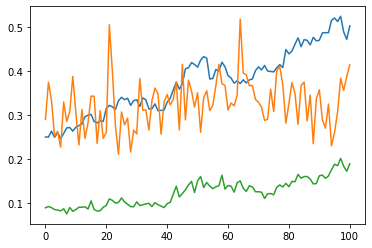

In [17]:

plt.plot(range(len(ctimes["lambdas"])), ctimes["lambdas"])
plt.plot(range(len(ctimes["pi_hills"])), np.array(ctimes["pi_hills"])/np.array(ctimes["local_S"]))
plt.plot(range(len(ctimes["abund_hills"])), np.array(ctimes["abund_hills"])/np.array(ctimes["local_S"]))

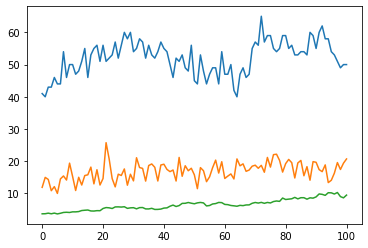

In [18]:
plt.plot(range(len(ctimes["local_S"])), ctimes["local_S"])
plt.plot(range(len(ctimes["pi_hills"])), np.array(ctimes["pi_hills"]))
plt.plot(range(len(ctimes["abund_hills"])), np.array(ctimes["abund_hills"]))

48
10000.0
1000
33


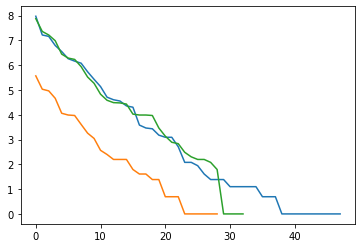

In [282]:
com_pre = data.l.community["local_abund"]
plt.plot(sorted(np.log(com_pre), reverse=True))
probs = data.l.community["local_abund"]/data.paramsdict["J"]
print(len(probs))
nsamp = data.paramsdict["J"]/10
new = np.random.multinomial(nsamp, probs)
print(com_pre.sum())
data.l.community["local_abund"] = new
com_post0 = data.l.community["local_abund"]
print(com_post0.sum())
plt.plot(sorted(np.log(data.l.community["local_abund"][data.l.community["local_abund"] > 0]), reverse=True))
data.l._step_wf(1)
com_post1 = data.l.community["local_abund"]
data.l._check_stop()
plt.plot(sorted(np.log(data.l.community["local_abund"]), reverse=True))
print(len(data.l.community))
ctimes["lambdas"].append(data.l._lambda)
ctimes["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
data.l._finalize()
ctimes["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
ctimes["local_S"].append(len(data.l.community))

In [258]:
gens = 500
while gens > 0:
    print(data.l._lambda, end=", ")
    ctimes["lambdas"].append(data.l._lambda)
    ctimes["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
    data.l._finalize()
    ctimes["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
    ctimes["local_S"].append(len(data.l.community))
    gens -= 10

    data.l._step_wf(10)
    data.l._check_stop()

# record the last bit
ctimes["lambdas"].append(data.l._lambda)
ctimes["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
data.l._finalize()
ctimes["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
ctimes["local_S"].append(len(data.l.community))

0.956, 0.9562, 0.9549, 0.951, 0.9474, 0.9442, 0.9533, 0.9528, 0.9518, 0.9482, 0.9456, 0.9514, 0.9424, 0.9401, 0.9436, 0.9473, 0.9561, 0.9558, 0.9545, 0.9493, 0.9526, 0.9442, 0.9515, 0.9625, 0.9583, 0.9588, 0.9702, 0.9741, 0.9747, 0.979, 0.9826, 0.9799, 0.9791, 0.983, 0.9867, 0.9838, 0.984, 0.9788, 0.9793, 0.9811, 0.9791, 0.9758, 0.9778, 0.9763, 0.9747, 0.9715, 0.9656, 0.9652000000000001, 0.9744, 0.9718, 

# EnvFilt w/ change in optimum

In [101]:
data = iBioGen.Core("BII")
data.set_param("assembly_model", "filtering")
data.set_param("ntaxa", 200)
data.set_param("ClaDS", False)
data.set_param("ecological_strength", 0.1)
data.set_param("colrate", "0.01")
data.set_param("J", "10000")
data.set_param("local_stop_time", 0.25)
data.set_param("local_stop_criterion", "equilibrium")
tre, results = data._simulate(verbose=True)

ntips 200
time 7.831580087133635
Birth events 309
Extinctions (per birth) 110 (0.3559870550161812)
Run generations: 11016
	[####################] 100% 0:00:01 | Finished local assembly 
Time left (myrs): 0.010985 - Lambda 0.25570000000000004


In [93]:
ctimes = {}
ctimes["lambdas"] = []
ctimes["pi_hills"] = []
ctimes["abund_hills"] = []
ctimes["local_S"] = []

data.l._check_stop()
idx = 0
print(data.l._lambda)
while data.l._lambda < 0.95 and idx < 100:
    print(data.l._lambda, end=", ")
    ctimes["lambdas"].append(data.l._lambda)
    ctimes["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
    data.l._finalize()
    ctimes["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
    ctimes["local_S"].append(len(data.l.community))
    idx += 1

    data.l._step_wf(10)
    data.l._check_stop()

# record the last bit
ctimes["lambdas"].append(data.l._lambda)
ctimes["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
data.l._finalize()
ctimes["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
ctimes["local_S"].append(len(data.l.community))

0.25529999999999997
0.25529999999999997, 0.3154, 0.40280000000000005, 0.4497, 0.5248999999999999, 0.5532, 0.6084, 0.6278, 0.6718999999999999, 0.7262, 0.7561, 0.7861, 0.78, 0.8155, 0.8586, 0.868, 0.8775, 0.8806, 0.8886000000000001, 0.9097, 0.907, 0.9206, 0.9313, 0.9387, 0.9421, 

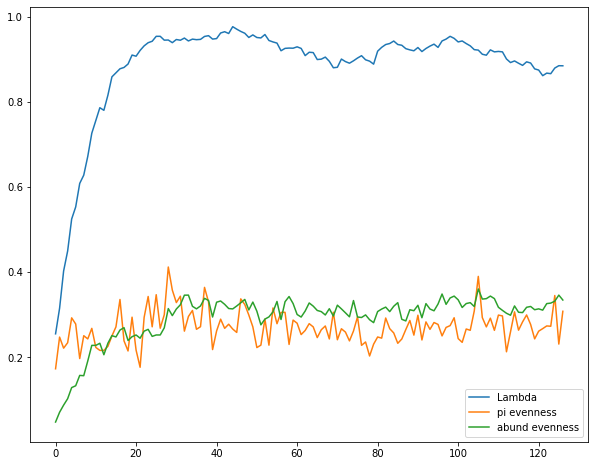

In [99]:
plt.figure(figsize=[10, 8])

plt.plot(range(len(ctimes["lambdas"])), ctimes["lambdas"], label="Lambda")
plt.plot(range(len(ctimes["pi_hills"])), np.array(ctimes["pi_hills"])/np.array(ctimes["local_S"]), label="pi evenness")
plt.plot(range(len(ctimes["abund_hills"])), np.array(ctimes["abund_hills"])/np.array(ctimes["local_S"]), label="abund evenness")
plt.legend()


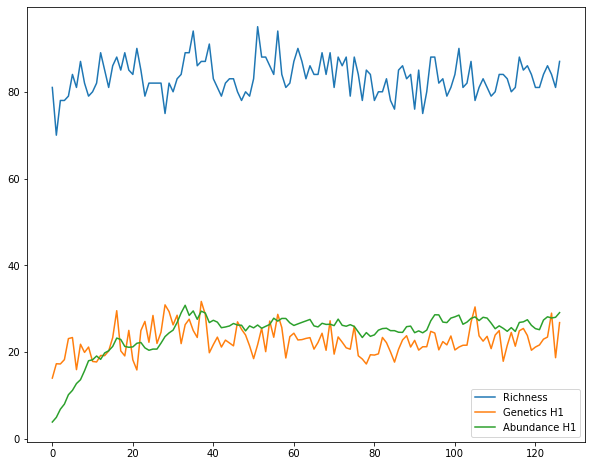

In [100]:
plt.figure(figsize=[10, 8])
plt.plot(range(len(ctimes["local_S"])), ctimes["local_S"], label="Richness")
plt.plot(range(len(ctimes["pi_hills"])), np.array(ctimes["pi_hills"]), label="Genetics H1")
plt.plot(range(len(ctimes["abund_hills"])), np.array(ctimes["abund_hills"]), label="Abundance H1")
plt.legend()


-0.9106065096000121


(array([18.,  7.,  9.,  4.,  1.,  6., 15.,  5., 10.,  7.]),
 array([-4.24484129, -3.56540817, -2.88597505, -2.20654194, -1.52710882,
        -0.8476757 , -0.16824259,  0.51119053,  1.19062364,  1.87005676,
         2.54948988]),
 <BarContainer object of 10 artists>)

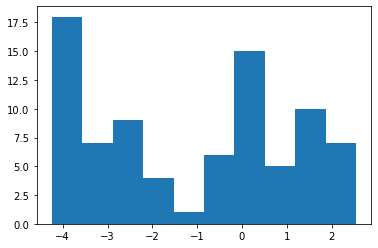

In [96]:
traits_pre = data.l.community["trait"]
print(data.l._local_trait_optimum)
plt.hist(data.l.community["trait"])

In [97]:
data.l._local_trait_optimum = 2

gens = 100
while gens > 0:
    print(data.l._lambda, end=", ")
    ctimes["lambdas"].append(data.l._lambda)
    ctimes["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
    data.l._finalize()
    ctimes["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
    ctimes["local_S"].append(len(data.l.community))
    gens -= 1

    data.l._step_wf(10)
    data.l._check_stop()

# record the last bit
ctimes["lambdas"].append(data.l._lambda)
ctimes["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
data.l._finalize()
ctimes["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
ctimes["local_S"].append(len(data.l.community))

0.9537, 0.9447, 0.945, 0.9388, 0.9462, 0.9445, 0.9496, 0.9428, 0.9471, 0.9458, 0.9465, 0.9534, 0.9552, 0.9472, 0.9484, 0.9615, 0.9645, 0.9603, 0.9763, 0.9705, 0.9652000000000001, 0.9609, 0.951, 0.957, 0.9509, 0.9499, 0.9579, 0.9439, 0.9405, 0.9378, 0.9198, 0.9254, 0.9261, 0.9258, 0.929, 0.9253, 0.9084, 0.9163, 0.9155, 0.8992, 0.9001, 0.9049, 0.895, 0.8799, 0.881, 0.9003, 0.8944, 0.8906000000000001, 0.8962, 0.9027000000000001, 0.9082, 0.8986, 0.8954, 0.8884, 0.9188000000000001, 0.9278, 0.9344, 0.9368, 0.9426, 0.9345, 0.9327, 0.9247, 0.9218999999999999, 0.9197, 0.9274, 0.9178999999999999, 0.9251, 0.9307, 0.9353, 0.9277, 0.9428, 0.9472, 0.9537, 0.9489, 0.9405, 0.9428, 0.9367, 0.9313, 0.9224, 0.9213, 0.9116, 0.9094, 0.9218999999999999, 0.9172, 0.9182, 0.9172, 0.9005, 0.8921, 0.8959, 0.8905, 0.8855, 0.8938, 0.891, 0.8773, 0.8745, 0.8613, 0.8673, 0.866, 0.8792, 0.8847, 

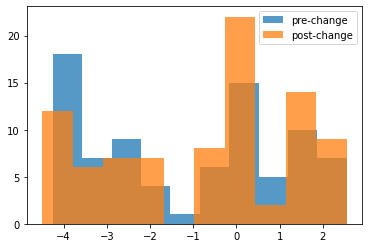

In [98]:
plt.hist(traits_pre, alpha=0.75, label="pre-change")
plt.hist(data.l.community["trait"], alpha=0.75, label="post-change")
plt.legend()

## Niche specialization

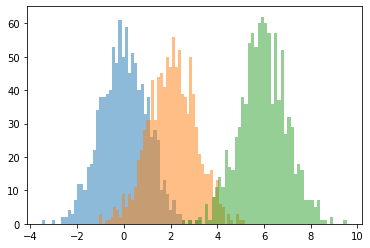

In [292]:
n1 = sorted(np.random.normal(0, 1, 1000))
n2 = sorted(np.random.normal(2, 1, 1000))
n6 = sorted(np.random.normal(6, 1, 1000))
_ = plt.hist(n1, bins=50, alpha=0.5)
_ = plt.hist(n2, bins=50, alpha=0.5)
_ = plt.hist(n6, bins=50, alpha=0.5)


Niche specialization is increased feeding specialization.
* Reduced alpha diversity, shift in composition of the dominant taxa (enrichment for certain metabolites as you become specialized).
* Increased diet specialization, increased evenness and reduced alpha diversity.
* More specialized taxa might increase beta diversity between taxa
* Mammal community varies from 4/5 up to 20. Ecologically and body size structured.
* Hawaii mostly structured through evolutionary processes, how communities would change as you get speciation and diversification
* Specialization within arthropods, how does increased specialization impact the metamicrobiome?

Instead of making the model fit the systems, we should make the systems fit the model.

On a young island things are everywhere and they're generalists

* Functional diversity reduces effective competition
* Maybe the stressor reduces functional diversity somehow?


## Temp trash

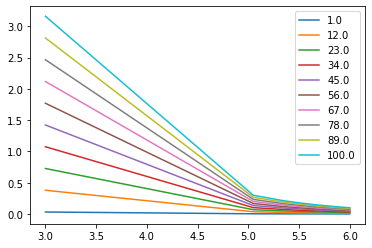

In [317]:
S = np.linspace(1, 100, 10)
N = np.linspace(1000, 1000000, 10)
def Mn(S, N):
    return S/np.sqrt(N)
for s in S:
    Mns = [Mn(s, x) for x in N]
    plt.plot(np.log10(N), Mns, label=s)
plt.legend()